<a href="https://colab.research.google.com/github/maxtuno/PEQNP/blob/master/docs/PEQNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.peqnp.com"><img border="0" alt="PEQNP" src="https://raw.githubusercontent.com/maxtuno/PEQNP/master/logo.png" width="640" height="400">

# PEQNP [![Downloads](https://pepy.tech/badge/peqnp)](https://pepy.tech/project/peqnp)
## MATHEMATICAL SOLVER

The PEQNP System its an automatic CNF encoder integrated with Python.

For more info visit [www.peqnp.com](http://www.peqnp.com) for consulting, personalized support, sponsoring, etc...  oscar.riveros@peqnp.science

#### Thanks to JetBrains for support this project!

<a href="https://www.jetbrains.com/?from=PEQNP"><img border="0" alt="JetBrains support this project" src="https://raw.githubusercontent.com/maxtuno/PEQNP/master/jetbrains.png" width="100" height="100">

# INSTALLATION
```python
pip install PEQNP
```

In [1]:
!pip install PEQNP

     |████████████████████████████████| 798kB 5.0MB/s 


# INTRODUCION
On PEQNP all elements are integers, the relations are at bit level or arithmetic level. All integers live on $\mathbb{N}_{2 ^ {bits} - 1}$ and always positives, i.e. for two integer $(x, y)$ the operation, $(x - y)$ take all possibilities such that $x - y >= 0$.

# SUPPORTED OPERATIONS
$+$, $-$, $*$, $/$, $**$, $abs$, $powmod$, $\%$, $\&$, $|$, $^$, $==$, $=$, $<$, $<=$, $>$, $>=$

# INTEGER FACTORIZATION
In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization.

In [2]:
import peqnp as cnf

rsa = 3007

cnf.engine(rsa.bit_length())

p = cnf.integer()
q = cnf.integer()

assert p * q == rsa

while cnf.satisfy():
    print(p, q)

97 31
3007 1
31 97
1 3007


# ABSOLUTE VALUES

In [3]:
import peqnp as cnf

cnf.engine(4)

x = cnf.integer()
y = cnf.integer()

assert abs(x - y) == 1

while cnf.satisfy():
    print(x, y, x - y, abs(x - y))

8 7 1 1
4 3 1 1
12 11 1 1
10 9 1 1
2 1 1 1
6 5 1 1
14 13 1 1
0 1 -1 1
2 3 -1 1
1 2 -1 1
10 11 -1 1
9 10 -1 1
8 9 -1 1
11 12 -1 1
3 4 -1 1
5 6 -1 1
4 5 -1 1
6 7 -1 1
13 14 -1 1
7 6 1 1
11 10 1 1
3 2 1 1
1 0 1 1
5 4 1 1
7 8 -1 1
13 12 1 1
12 13 -1 1
9 8 1 1


# FERMAT'S FACTORIZATION METHOD

Note: when there is a negative number in the model, increment the bits by 1.

In [4]:
import peqnp as cnf

rsa = 3007

cnf.engine(rsa.bit_length() + 1)

p = cnf.integer()
q = cnf.integer()

assert p ** 2 - q ** 2 == rsa

if cnf.satisfy(turbo=True):
    print(p, q, p + q, p - q)
else:
    print('Is Prime!')

64 33 97 31


# EXPONENTIAL DIOPHANTINE EQUATIONS


In [5]:
import peqnp as cnf

cnf.engine(16)

x = cnf.integer()
y = cnf.integer()
z = cnf.integer()

assert x ** y == z

while cnf.satisfy():
    print(x, y, z)

0 4 0
4 4 256
4 7 16384
0 7 0
1 7 1
1 3 1
1 1 1
1 2 1
1 6 1
1 4 1
0 6 0
0 5 0
1 5 1
2 1 2
2 2 4
2 3 8
2 6 64
2 4 16
2 7 128
2 5 32
0 2 0
0 3 0
0 1 0
3 1 3
3 5 243
3 3 27
3 2 9
3 4 81
3 6 729
3 7 2187
4 3 64
4 2 16
4 1 4
4 6 4096
4 5 1024


# ON THE DIOPHANTINE EQUATION $x^2 + c = 3^n$ WITH $x, c, n > 1$

In [6]:
import peqnp as cnf

n = 32

cnf.engine(n.bit_length())

_3 = cnf.constant(3)
n = cnf.integer()
x = cnf.integer()
c = cnf.integer()

assert x ** 2 + c == _3 ** n
assert x > 1
assert c > 1
assert n > 1

if cnf.satisfy(turbo=True):
    print(n, x, c)
else:
    print('Infeasible for bit range...')

2 2 5


# FACTORIALS

In [7]:
import math
import peqnp as cnf

cnf.engine(32)

x = cnf.integer()

cnf.factorial(x) == math.factorial(10)

if cnf.satisfy(turbo=True):
    print(x)
else:
    print('Need more bits!')

10


# $\Sigma$

In [8]:
import peqnp as cnf

cnf.engine(16)

x = cnf.integer()
n = cnf.integer()

cnf.sigma(lambda k: k ** 2, 1, n) == x

while cnf.satisfy():
    print(x, n, sum(k ** 2 for k in range(1, n.value + 1)))


0 0 0
819 13 819
91 6 91
30 4 30
14 3 14
650 12 650
506 11 506
5 2 5
1 1 1
385 10 385
285 9 285
1015 14 1015
204 8 204
140 7 140
55 5 55


# $\Pi$

In [9]:
import functools
import operator
import math
import peqnp as cnf

cnf.engine(32)

x = cnf.integer()
n = cnf.integer()

cnf.pi(lambda k: k ** 2, 1, n) == x
assert 0 < x <= 10 ** math.log(cnf.oo()) # limit the CNF overflow
assert n > 0

while cnf.satisfy():
    print(x, n, functools.reduce(operator.mul, (k ** 2 for k in range(1, n.value + 1))))

518400 6 518400
576 4 576
1 1 1
4 2 4
36 3 36
14400 5 14400
25401600 7 25401600


# PEQNP VS FIBONACCI NUMBERS | N VS TIME

2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986
40 102334155
41 165580141
42 267914296
43 433494437
44 701408733
45 1134903170
46 1836311903
47 2971215073
48 4807526976
49 7778742049
50 12586269025
51 20365011074
52 32951280099
53 53316291173
54 86267571272
55 139583862445
56 225851433717
57 365435296162
58 591286729879
59 956722026041
60 1548008755920
61 2504730781961
62 4052739537881
63 6557470319842
64 10610209857723
65 17167680177565
66 27777890035288
67 44945570212853
68 72723460248141
69 117669030460994
70 190392490709135
71 308061521170129
72 498454011879264
73 806515533049393
74 1304969544928657
75 2111485077978050
76 3416454622906707
77 5527939700884757
78 8944394323791464
79 14472334024676221
80 23416728348467685
81 

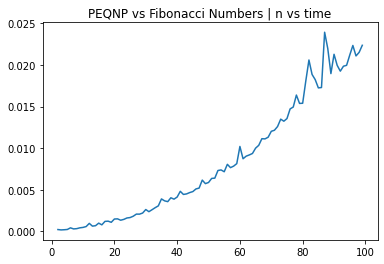

In [10]:
import time
import peqnp as cnf
import matplotlib.pyplot as plt

ns, ts = [], []
for n in range(2, 100):

    cnf.engine(n)

    x = cnf.vector(size=n + 1)

    assert x[0] == 0
    assert x[1] == 1
    for i in range(2, n + 1):
        assert x[i - 1] + x[i - 2] == x[i]

    ini = time.time()
    if cnf.satisfy(turbo=True):
        print(n, x[n])
    else:
        print('Infeasible ...')
    end = time.time()
    ns.append(n)
    ts.append(end - ini)

plt.title('PEQNP vs Fibonacci Numbers | n vs time')
plt.plot(ns, ts)
plt.show()

# TENSORS

Tensors object are the most advanced concept behind PEQNP, integers are tensors, work like integers, but their bits act like an multidimensional matrix of lambda functions.

Note: [[*]] for acces to lambda (bit) functions.

In [11]:
import peqnp as cnf

cnf.engine(10)

x = cnf.tensor(dimensions=(4))
y = cnf.tensor(dimensions=(2, 2))

assert x + y == 10
assert x[[0]](0, 1) == 1
assert y[[0, 0]](0, 1) == 1

while cnf.satisfy():
    print(x, y, x.binary, y.binary)

9 1 [True, False, False, True] [[True, False], [False, False]]
1 9 [True, False, False, False] [[True, False], [False, True]]
5 5 [True, False, True, False] [[True, False], [True, False]]
7 3 [True, True, True, False] [[True, True], [False, False]]
3 7 [True, True, False, False] [[True, True], [True, False]]


In [12]:
import numpy as np
import peqnp as cnf

n = 2

cnf.engine(4)

x = cnf.tensor(dimensions=(n, n))
a = cnf.integer()
b = cnf.integer()

assert sum(x[[i, j]](a ** 2 - b ** 3, a ** 3 - b ** 2) for i in range(n) for j in range(n)) == 0

while cnf.satisfy():
    print(a, b)
    print(np.vectorize(int)(x.binary))
    print()

0 0
[[0 0]
 [0 0]]

0 0
[[0 1]
 [0 0]]

0 0
[[1 0]
 [0 0]]

0 0
[[1 1]
 [0 0]]

0 0
[[1 1]
 [1 0]]

0 0
[[1 0]
 [1 0]]

0 0
[[0 0]
 [1 0]]

0 0
[[1 0]
 [0 1]]

0 0
[[1 1]
 [0 1]]

1 1
[[1 1]
 [0 1]]

1 1
[[1 1]
 [0 0]]

1 1
[[1 0]
 [0 0]]

1 1
[[1 0]
 [0 1]]

1 1
[[1 1]
 [1 0]]

1 1
[[1 0]
 [1 0]]

1 1
[[1 0]
 [1 1]]

1 1
[[0 0]
 [1 1]]

1 1
[[0 0]
 [1 0]]

0 0
[[0 0]
 [1 1]]

0 0
[[1 0]
 [1 1]]

1 1
[[0 0]
 [0 1]]

1 1
[[0 1]
 [0 1]]

1 1
[[0 1]
 [1 1]]

1 1
[[0 1]
 [1 0]]

1 1
[[0 1]
 [0 0]]

1 1
[[0 0]
 [0 0]]

0 0
[[0 1]
 [1 0]]

0 0
[[0 1]
 [1 1]]

0 0
[[0 1]
 [0 1]]

0 0
[[0 0]
 [0 1]]



# RSA FACTORIZATION WITH TENSORS

In [13]:
import peqnp as cnf

rsa = 3007

cnf.engine(rsa.bit_length())

p = cnf.tensor(dimensions=(cnf.bits()))
q = cnf.tensor(dimensions=(cnf.bits()))

assert p * q == rsa
assert p[[0]](0, 1) == 1
assert q[[0]](0, 1) == 1
assert sum(p[[i]](0, 1) for i in range(cnf.bits() // 2 + 1, cnf.bits())) == 0
assert sum(q[[i]](0, 1) for i in range(cnf.bits() // 2, cnf.bits())) == 0

if cnf.satisfy(turbo=True, log=True):
    print(p, q)
else:
    print('Is Prime!')

97 31


# SAT REFORMULATION WITH TENSORS

In [14]:
import functools
import operator
import sys

import peqnp as cnf


n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]


if __name__ == '__main__':
    
    cnf.engine(bits=1)
    
    x = cnf.tensor(dimensions=(n,), key='x')
    
    assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
    
    if cnf.satisfy(turbo=True, log=True):
        print('SAT')
        print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
    else:
        print('')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# SUM SUBSET PROBLEM WITH TENSORS

In [15]:
import numpy as np
import peqnp as cnf

universe = np.random.randint(1, 2 ** 16, size=100)
t = np.random.randint(min(universe), sum(universe))

cnf.engine(t.bit_length())

x = cnf.tensor(dimensions=(len(universe)))

assert sum(x[[i]](0, universe[i]) for i in range(len(universe))) == t

if cnf.satisfy(turbo=True):
    sub = [universe[i] for i in range(len(universe)) if x.binary[i]]
    print(t, sum(sub), sub)
else:
    print('Infeasible ...')

635243 635243 [1517, 19959, 11036, 6087, 26203, 37976, 58815, 271, 39528, 9015, 37608, 48003, 13829, 30360, 15875, 7928, 13129, 21109, 23857, 20541, 53819, 43069, 33362, 6750, 55597]


# MULTISET RECONSTRUCTION BY DIFFERENCES

Given a sorted multiset, their differences and one tip (an element and position for only one arbitrary element), is possible recovery the original multiset?

In [16]:
import time
import random
import peqnp as cnf


def generator(n, max_val):
    return sorted([random.randint(1, max_val) for _ in range(n)])


def differences(lst):
    return [abs(lst[i] - lst[i - 1]) for i in range(1, len(lst))]


# 100 tests
for n in range(1, 10):

    m = random.randint(1, n ** 2)

    original = generator(n, m)
    diffs = differences(original)

    print('N, M         : {}, {}'.format(n, m))
    print('DIFFERENCES  : {}'.format(diffs))
    print('ORIGINAL     : {}'.format(original))

    # only one tip
    ith = random.choice(range(n))
    tip = original[ith]

    # init timer
    ini = time.time()

    # Empirical bits necessarily to solve the problem.
    cnf.engine(sum(diffs).bit_length() + 4)

    # Declare a n-vector of integer variables to store the solution.
    x = cnf.vector(size=n)

    # The tip is on x at index ith
    assert tip == cnf.index(ith, x)

    # The i-th element of the instance is the absolute difference of two consecutive elements
    for i in range(n - 1):
        assert x[i] <= x[i + 1]
        assert cnf.index(i, diffs) == x[i + 1] - x[i]

    # Solve the problem for only one solution
    # Turbo parameter is a destructive simplification
    # Solve with all power os SLIME SAT Solver but only for the fist solution.
    if cnf.satisfy(turbo=True):
        o = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        c = 100 * len(set(map(int, x)).intersection(set(original))) / len(set(original))
        print('SOLVED       : {}'.format(x))
        print('COINCIDENCES : {}%'.format(c))
        if o == diffs:
            print('OK! - {}s'.format(time.time() - ini))
        else:
            print('NOK! - {}s'.format(time.time() - ini))
            raise Exception('ERROR!')
        if c != 100:
            raise Exception('Hypothesis Fail - 100%')

N, M         : 1, 1
DIFFERENCES  : []
ORIGINAL     : [1]
SOLVED       : [1]
COINCIDENCES : 100.0%
OK! - 0.012939691543579102s
N, M         : 2, 3
DIFFERENCES  : [1]
ORIGINAL     : [1, 2]
SOLVED       : [1, 2]
COINCIDENCES : 100.0%
OK! - 0.0046231746673583984s
N, M         : 3, 8
DIFFERENCES  : [0, 2]
ORIGINAL     : [5, 5, 7]
SOLVED       : [5, 5, 7]
COINCIDENCES : 100.0%
OK! - 0.006284475326538086s
N, M         : 4, 14
DIFFERENCES  : [0, 3, 3]
ORIGINAL     : [3, 3, 6, 9]
SOLVED       : [3, 3, 6, 9]
COINCIDENCES : 100.0%
OK! - 0.012232303619384766s
N, M         : 5, 23
DIFFERENCES  : [0, 2, 0, 7]
ORIGINAL     : [5, 5, 7, 7, 14]
SOLVED       : [5, 5, 7, 7, 14]
COINCIDENCES : 100.0%
OK! - 0.02045273780822754s
N, M         : 6, 34
DIFFERENCES  : [9, 3, 8, 2, 4]
ORIGINAL     : [2, 11, 14, 22, 24, 28]
SOLVED       : [2, 11, 14, 22, 24, 28]
COINCIDENCES : 100.0%
OK! - 0.037526845932006836s
N, M         : 7, 25
DIFFERENCES  : [2, 8, 1, 0, 0, 7]
ORIGINAL     : [6, 8, 16, 17, 17, 17, 24]
SOLVED 

# MIP

A submodule dedicated to Mixed Integer Programming.

https://en.wikipedia.org/wiki/Integer_programming

In [17]:
import peqnp as cnf

cnf.engine()

x0 = cnf.linear(is_real=True)
x1 = cnf.linear(is_real=True)
x2 = cnf.linear(is_real=True)
x3 = cnf.linear(is_real=True)
x4 = cnf.linear(is_real=True)
x5 = cnf.linear()
x6 = cnf.linear()
x7 = cnf.linear()
x8 = cnf.linear()
x9 = cnf.linear()
assert +6.4160 * x0 + 20.3590 * x1 + 1.5981 * x2 - 1.2071 * x3 - 4.6026 * x4 - 5.7098 * x5 - 4.1160 * x6 + 1.2467 * x7 - 14.2028 * x8 + 6.0885 * x9 <= 51.0000
assert -0.1930 * x0 + 1.1859 * x1 + 2.9537 * x2 - 2.3777 * x3 + 1.4154 * x4 + 9.2526 * x5 - 3.6259 * x6 + 3.4193 * x7 - 21.4218 * x8 - 0.7692 * x9 <= 41.0000
assert -27.1712 * x0 - 21.2901 * x1 + 32.6104 * x2 + 1.4699 * x3 + 8.1651 * x4 - 12.8153 * x5 + 2.4100 * x6 - 57.0053 * x7 - 7.2989 * x8 + 7.0098 * x9 <= 79.0000
assert -2.3318 * x0 + 0.8284 * x1 + 6.2896 * x2 + 0.6104 * x3 - 31.1931 * x4 + 4.1556 * x5 + 2.6317 * x6 - 48.5799 * x7 - 1.1840 * x8 + 28.7408 * x9 <= 93.0000
assert +12.0876 * x0 + 1.2307 * x1 - 0.9757 * x2 - 4.2857 * x3 + 4.8579 * x4 + 19.5823 * x5 + 18.5408 * x6 - 3.0287 * x7 + 2.0617 * x8 - 3.5956 * x9 <= 25.0000
assert -50.3777 * x0 + 6.9980 * x1 - 67.9637 * x2 - 2.0244 * x3 + 7.8885 * x4 - 2.5394 * x5 - 5.3325 * x6 + 0.3273 * x7 - 249.6093 * x8 + 3.7692 * x9 <= 41.0000
assert +43.2031 * x0 - 2.0964 * x1 + 10.1320 * x2 - 13.9120 * x3 + 3.2838 * x4 + 10.6522 * x5 + 6.2647 * x6 + 2.8932 * x7 - 6.3529 * x8 + 20.0324 * x9 <= 78.0000
assert -2.0752 * x0 - 7.4701 * x1 - 0.2348 * x2 - 2.0003 * x3 - 0.6376 * x4 + 1.7804 * x5 + 119.5958 * x6 - 6.2943 * x7 + 3.3538 * x8 - 2.6467 * x9 <= 27.0000
assert +3.1615 * x0 + 6.0781 * x1 - 1.8893 * x2 - 3.2409 * x3 - 34.0146 * x4 + 23.8191 * x5 - 8.8890 * x6 - 6.8173 * x7 + 6.7114 * x8 - 8.1344 * x9 <= 21.0000
assert +0.0000 * x0 + 13.1440 * x1 + 7.5737 * x2 + 2.8277 * x3 - 4.3930 * x4 + 0.0000 * x5 - 22.1786 * x6 + 2.8980 * x7 - 9.0440 * x8 - 60.4170 * x9 <= 93.0000
assert x0 <= 92.0000
assert x1 <= 46.0000
assert x2 <= 74.0000
assert x3 <= 78.0000
assert x4 <= 41.0000
assert x5 <= 47.0000
assert x6 <= 33.0000
assert x7 <= 35.0000
assert x8 <= 23.0000
assert x9 <= 63.0000
print(cnf.maximize(+0.0000 * x0 + 9.6856 * x1 + 0.0000 * x2 - 7.8267 * x3 - 3.4649 * x4 - 6.3391 * x5 - 3.6316 * x6 + 44.7655 * x7 + 3.7610 * x8 - 57.1083 * x9))
print(x0)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)
print(x9)

1810.5335855955589
0.0
16.609160567807837
0.0
0.0
0.0
0
1
35
23
0


# DIOPHANTINE EQUATIONS

https://en.wikipedia.org/wiki/Diophantine_equation

### Let be $x, y \in \mathbb{N} \vert x^3 - x + 1 = y^2$

In [18]:
import peqnp as cnf

cnf.engine(10)

x = cnf.integer()
y = cnf.integer()

assert x ** 3 - x + 1 == y ** 2

assert x != 0
assert y != 0

while cnf.satisfy():
    print('{0} ** 3 - {0} + 1, {1} ** 2'.format(x, y))

5 ** 3 - 5 + 1, 11 ** 2
1 ** 3 - 1 + 1, 1 ** 2
3 ** 3 - 3 + 1, 5 ** 2


### Let be $x, y \in \mathbb{Q} \vert x^3 + xy = y^2$

In [19]:
import peqnp as pn

pn.engine(10)

x = pn.rational()
y = pn.rational()

assert x ** 3 + x * y == y ** 2

while pn.satisfy():
    print('{0} ** 3 + {0} * {1} == {1} ** 2'.format(x, y))

(0 / 1) ** 3 + (0 / 1) * (0 / 1) == (0 / 1) ** 2
(2 / 1) ** 3 + (2 / 1) * (4 / 1) == (4 / 1) ** 2
(6 / 1) ** 3 + (6 / 1) * (18 / 1) == (18 / 1) ** 2
(0 / 2) ** 3 + (0 / 2) * (0 / 16) == (0 / 16) ** 2


### Let be $x, y \in \mathbb{C} \vert x^3 + x + 1 = y^2$

In [20]:
import peqnp as cnf

cnf.engine(10)

x = cnf.gaussian()
y = cnf.gaussian()

assert x ** 3 + x + 1 == y ** 2

while cnf.satisfy():
    print('{0} ** 3 + {0} + 1 == {1} ** 2'.format(complex(x), complex(y)))

0j ** 3 + 0j + 1 == (1+0j) ** 2
(2+1j) ** 3 + (2+1j) + 1 == (3+2j) ** 2


# Vectors

In [21]:
import peqnp as cnf

cnf.engine(10)

x = cnf.vector(size=2, is_gaussian=True)
y = cnf.gaussian()

assert sum(x) ** 3 == y ** 5
assert y != complex(0, 0)

while cnf.satisfy():
    print('sum({0}) ** 3 == {1} ** 5'.format(x, y))

sum([(1+0j), (0+0j)]) ** 3 == (1+0j) ** 5
sum([(0+0j), (1+0j)]) ** 3 == (1+0j) ** 5


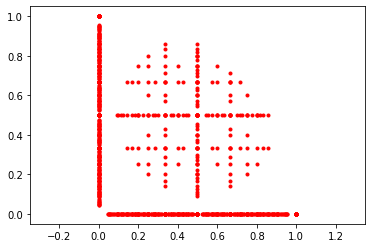

In [22]:
import numpy as np
import peqnp as cnf
import matplotlib.pyplot as plt

dim = 2

cnf.engine(9)

ps = cnf.vector(size=dim, is_rational=True)

assert sum([p ** dim for p in ps]) <= 1

dots = []
while cnf.satisfy():
    dots.append(np.vectorize(float)(ps))

x, y = zip(*dots)
plt.axis('equal')
plt.plot(x, y, 'r.')
plt.show()

# NP-COMPLETE PROBLEMS

NP-Complete problem, any of a class of computational problems for which no efficient solution algorithm has been found. Many significant computer - science problems belong to this class—e.g., the traveling salesman problem, satisfiability problems, and graph - covering problems.

https://en.wikipedia.org/wiki/NP-completeness

# SATISFIABILITY

Study of boolean functions generally is concerned with the set of truth assignments(assignments of 0 or 1 to each of the variables) that make the function true.

https://en.wikipedia.org/wiki/Boolean_satisfiability_problem

In [23]:
import functools
import operator

import peqnp as cnf

n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]

cnf.engine(bits=1)
x = cnf.tensor(dimensions=(n,), key='x')
assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
if cnf.satisfy(turbo=True):
    print('SAT')
    print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
else:
    print('UNSAT')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# k-CLIQUE

Input: Graph $G$, positive integer $k$

Property: $G$ has a set of mutually adjacent nodes.

https://en.wikipedia.org/wiki/Clique_problem

In [24]:
import peqnp as cnf

# Ths bits of the clique to search
k = 3

# Get the graph, and the dimension for the graph
n, matrix = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)]

# Ensure the problem can be represented
cnf.engine(bits=k.bit_length())

# Declare an integer of n-bits
bits = cnf.integer(bits=n)

# The bits integer have "bits"-active bits, i.e, the clique has "bits"-elements
assert sum(cnf.switch(bits, i) for i in range(n)) == k

# This entangles all elements that are joined together
for i in range(n - 1):
    for j in range(i + 1, n):
        if (i, j) not in matrix and (j, i) not in matrix:
            assert cnf.switch(bits, i) + cnf.switch(bits, j) <= 1

if cnf.satisfy(turbo=True):
    print(k)
    print(' '.join([str(i) for i in range(n) if not bits.binary[i]]))
else:
    print('Infeasible ...')

3
0 1 2


# VERTEX COVER

In the mathematical discipline of graph theory, a vertex cover (sometimes node cover) of a graph is a set of vertices that includes at least one endpoint of every edge of the graph. The problem of finding a minimum vertex cover is a classical optimization problem in computer science and is a typical example of an NP-hard optimization problem that has an approximation algorithm. Its decision version, the vertex cover problem, was one of Karp's 21 NP-complete problems and is therefore a classical NP-complete problem in computational complexity theory. Furthermore, the vertex cover problem is fixed-parameter tractable and a central problem in parameterized complexity theory.

https://en.wikipedia.org/wiki/Vertex_cover

In [25]:
import peqnp as cnf

# Get the graph and dimension, and the bits of the cover.
n, graph, vertex, k = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)], [0, 1, 2, 3, 4], 3

# Ensure the problem can be represented
cnf.engine(bits=n.bit_length() + 1)

# An integer with n-bits to store the indexes for the cover
index = cnf.integer(bits=n)

# This entangled the all possible covers
for i, j in graph:
    assert cnf.switch(index, vertex.index(i), neg=True) + cnf.switch(index, vertex.index(j), neg=True) >= 1

# Ensure the cover has bits k
assert sum(cnf.switch(index, vertex.index(i), neg=True) for i in vertex) == k

if cnf.satisfy(turbo=True):
    opt = sum(index.binary)
    print('p bits {}'.format(opt))
    print(' '.join([str(vertex[i]) for i in range(n) if index.binary[i]]))
else:
    print('Infeasible ...')

p bits 3
1 2 4


# MULTIDIMENSIONAL LATIN SQUARES

In combinatorics and in experimental design, a Latin square is an n × n array filled with n different symbols, each occurring exactly once in each row and exactly once in each column.

https://en.wikipedia.org/wiki/Latin_square

In [26]:
import numpy as np
import peqnp as cnf

n = 6
m = 3

cnf.engine(n.bit_length())

Y = cnf.vector(size=n ** m)

cnf.apply_single(Y, lambda k: k < n)

Y = np.reshape(Y, newshape=(m * [n]))

for i in range(n):
    cnf.all_different(Y[i])
    cnf.all_different(Y.T[i])
    for j in range(n):
        cnf.all_different(Y[i][j])
        cnf.all_different(Y.T[i][j])

for idx in cnf.hyper_loop(m - 1, n):
    s = Y
    for i in idx:
        s = s[i]
        cnf.all_different(s)
        cnf.all_different(s.T)

if cnf.satisfy(turbo=True):
    y = np.vectorize(int)(Y).reshape(m * [n])
    print(y)
else:
    print('Infeasible ...')

[[[3 4 5 2 1 0]
  [2 0 1 3 5 4]
  [1 3 0 4 2 5]
  [4 5 3 1 0 2]
  [0 1 2 5 4 3]
  [5 2 4 0 3 1]]

 [[0 1 2 3 4 5]
  [4 5 0 1 2 3]
  [2 0 4 5 3 1]
  [3 2 1 0 5 4]
  [5 4 3 2 1 0]
  [1 3 5 4 0 2]]

 [[2 0 3 1 5 4]
  [0 2 4 5 3 1]
  [5 4 2 0 1 3]
  [1 3 5 4 2 0]
  [4 5 1 3 0 2]
  [3 1 0 2 4 5]]

 [[5 2 1 4 0 3]
  [1 3 5 0 4 2]
  [4 1 3 2 5 0]
  [2 4 0 5 3 1]
  [3 0 4 1 2 5]
  [0 5 2 3 1 4]]

 [[1 5 4 0 3 2]
  [5 4 3 2 1 0]
  [3 2 5 1 0 4]
  [0 1 2 3 4 5]
  [2 3 0 4 5 1]
  [4 0 1 5 2 3]]

 [[4 3 0 5 2 1]
  [3 1 2 4 0 5]
  [0 5 1 3 4 2]
  [5 0 4 2 1 3]
  [1 2 5 0 3 4]
  [2 4 3 1 5 0]]]


# TRAVELLING SALESMAN PROBLEM WITH HESS ALGORITHM (O. RIVEROS)

https://independent.academia.edu/oarr

The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

https://en.wikipedia.org/wiki/Travelling_salesman_problem

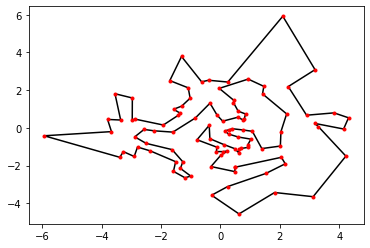

In [27]:
import peqnp as cnf
import numpy as np
import matplotlib.pyplot as plt

n = 100
data = np.random.logistic(size=(n, 2))
seq = cnf.hess_sequence(n, oracle=lambda seq: sum(np.linalg.norm(data[seq[i - 1]] - data[seq[i]]) for i in range(n)), fast=False)
x, y = zip(*[data[i] for i in seq + [seq[0]]])
plt.plot(x, y, 'k-')
plt.plot(x, y, 'r.')
plt.show()

# KNAPSACK PROBLEM

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items.

https://en.wikipedia.org/wiki/Knapsack_problem

In [28]:
import peqnp as cnf
import numpy as np

n = 50
values = abs(np.random.logistic(size=n))
profit = abs(np.random.logistic(size=n))
capacity = np.random.sample()
cnf.engine()
selects = cnf.vector(size=n, is_mip=True)
cnf.apply_single(selects, lambda x: x <= 1)
assert np.dot(values, selects) <= capacity
opt = cnf.maximize(np.dot(profit, selects))
slots = list(map(int, selects))
print('PROFIT  : {} vs {}'.format(np.dot(profit, slots), opt))
print('VALUES  : {} <= {}'.format(np.dot(values, slots), capacity))
print('SELECT  : {}'.format(slots))

PROFIT  : 9.723562540053665 vs 9.723562540053665
VALUES  : 0.9333594973135024 <= 0.9467889292850874
SELECT  : [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


# MAGIC SQUARE


In recreational mathematics and combinatorial design, a magic square is a $n\times n$ square grid (where n is the number of cells on each side) filled with distinct positive integers in the range 
${1,2,...,n^{2}}$ such that each cell contains a different integer and the sum of the integers in each row, column and diagonal is equal.

https://en.wikipedia.org/wiki/Magic_square

In [29]:
import peqnp as cnf
import numpy as np

n = 3

cnf.engine(5)

c = cnf.integer()

xs = cnf.matrix(dimensions=(n, n))

cnf.apply_single(cnf.flatten(xs), lambda x: x > 0)
cnf.all_different(cnf.flatten(xs))

for i in range(n):
    assert sum(xs[i][j] for j in range(n)) == c
for j in range(n):
    assert sum(xs[i][j] for i in range(n)) == c

assert sum(xs[i][i] for i in range(n)) == c
assert sum(xs[i][n - 1 - i] for i in range(n)) == c

if cnf.satisfy(turbo=True):
    print(c)
    print(np.vectorize(int)(xs))
else:
    print('Infeasible ...')

18
[[ 2  9  7]
 [11  6  1]
 [ 5  3 10]]


# SCHUR TRIPLES PROBLEM:

Input: list of 3N distinct positive integers

Question: Is there a partition of the list into N triples $(a_i, b_i, c_i)$ such that $a_i+b_i=c_i$

The condition that all numbers must be distinct makes the problem very interesting and McDiarmid calls it a surprisingly troublesome.

https://cstheory.stackexchange.com/questions/16253/list-of-strongly-np-hard-problems-with-numerical-data

In [30]:
import peqnp as cnf
import numpy as np

bits = 7
size = 3 * 10
triplets = []
while len(triplets) < size:
    a = np.random.randint(1, 2 ** bits)
    b = np.random.randint(1, 2 ** bits)
    if a != b and a not in triplets and b not in triplets and a + b not in triplets:
        triplets += [a, b, a + b]
triplets.sort()
print(triplets)
cnf.engine(bits=max(triplets).bit_length())
xs, ys = cnf.permutations(triplets, size)
for i in range(0, size, 3):
    assert ys[i] + ys[i + 1] == ys[i + 2]
if cnf.satisfy(turbo=True):
    for i in range(0, size, 3):
        print('{} == {} + {}'.format(ys[i + 2], ys[i], ys[i + 1]))
else:
    print('Infeasible ...')

[20, 32, 33, 42, 44, 47, 51, 55, 56, 57, 63, 66, 70, 73, 84, 88, 90, 92, 95, 97, 98, 100, 107, 112, 115, 125, 135, 145, 173, 185]
100 == 44 + 56
115 == 42 + 73
112 == 20 + 92
125 == 70 + 55
95 == 63 + 32
145 == 47 + 98
185 == 88 + 97
173 == 107 + 66
135 == 84 + 51
90 == 57 + 33


# SUBSET SUM PROBLEM

In this problem, there is a given set with some integer elements. And another some value is also provided, we have to find a subset of the given set whose sum is the same as the given sum value.

https://en.wikipedia.org/wiki/Subset_sum_problem

In [31]:
import peqnp as cnf
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))

print(t, universe)

cnf.engine(t.bit_length())

bits, subset = cnf.subsets(universe)

assert sum(subset) == t

if cnf.satisfy(turbo=True):
    solution = [universe[i] for i in range(len(universe)) if bits.binary[i]]
    print(sum(solution), solution)
else:
    print('Infeasible ...')

8964 [585 901 812 973 133 186 217  84 883 271 986 647 389 773 371 497 668 277
 254 476  73 507 769 144 844 988 212 965 406 382 282 610]
8964 [585, 901, 973, 186, 217, 271, 371, 497, 668, 476, 73, 507, 769, 144, 844, 988, 212, 282]


# PERMUTATION RECONSTRUCTION FROM DIFFERENCES

https://arxiv.org/pdf/1410.6396.pdf

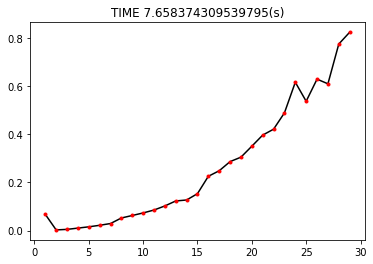

In [44]:
import peqnp as cnf
import numpy as np
import matplotlib.pyplot as plt

def gen_instance(n):
    import random
    y = list(range(1, n + 1))
    random.shuffle(y)
    return [abs(y[i + 1] - y[i]) for i in range(n - 1)]


import time
start = time.time()
times = []
sizes = []
for n in range(1, 30):
    diffs = gen_instance(n)
    ini = time.time()
    cnf.engine(n.bit_length() + 1)
    x = cnf.vector(size=n)
    cnf.all_different(x)
    cnf.apply_single(x, lambda a: 1 <= a <= n)
    for i in range(n - 1):
        assert cnf.index(i, diffs) == cnf.one_of([x[i + 1] - x[i], x[i] - x[i + 1]])
    if cnf.satisfy(turbo=True):
        end = time.time() - ini
        xx = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        if xx == diffs:
            sizes.append(n)
            times.append(end)
        else:
            raise Exception('Error!')
    else:
        raise Exception('Error!')
end = time.time() - start
plt.title('TIME {}(s)'.format(end))
plt.plot(sizes, times, 'k-')
plt.plot(sizes, times, 'r.')
plt.show()
plt.close()

# HAMILTONIAN CYCLE PROBLEM

In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle. Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is NP-complete.

https://en.wikipedia.org/wiki/Hamiltonian_path

In [33]:
import sys

import peqnp as cnf
import numpy as np


n = 10
M = np.random.randint(0, 2, size=(n, n))

print(M)

cnf.engine((n ** 2).bit_length())
ids, elements = cnf.matrix_permutation((1 - M).flatten(), n)

assert sum(elements) == 0

if cnf.satisfy(turbo=True):
    for i in ids:
        for j in ids:
            sys.stdout.write('{} '.format(M[i.value][j.value]))
        sys.stdout.write('\n') 
    sys.stdout.write('\n')
else:
    print('Infeasible ...')

[[1 0 1 0 0 0 1 1 0 1]
 [1 0 0 1 0 1 1 1 1 1]
 [0 0 1 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 0 1 0]
 [1 0 1 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0]]
0 1 1 0 1 0 1 0 1 0 
0 1 1 0 0 0 1 0 0 0 
1 0 0 1 0 0 1 0 0 0 
1 0 1 0 1 0 1 1 1 1 
1 1 0 0 0 1 0 1 0 0 
0 0 0 0 1 0 1 1 0 1 
1 0 0 1 0 0 1 1 0 0 
1 1 0 0 0 1 0 0 1 0 
0 1 0 0 1 0 1 0 1 1 
1 0 0 0 1 0 0 0 0 0 



# BIN PACKING PROBLEM

In the bin packing problem, items of different volumes must be packed into a finite number of bins or containers each of a fixed given volume in a way that minimizes the number of bins used. In computational complexity theory, it is a combinatorial NP-hard problem. The decision problem (deciding if items will fit into a specified number of bins) is NP-complete.

https://en.wikipedia.org/wiki/Bin_packing_problem

In [34]:
import peqnp as cnf
import numpy as np

capacity = 50
size = 50
elements = sorted([np.random.randint(1, capacity // 2 - 1) for _ in range(size)], reverse=True)
print(capacity)
print(elements)
bins = int(np.ceil(sum(elements) / capacity))
while True:
    cnf.engine(bits=capacity.bit_length() + 1)
    slots = cnf.vector(bits=len(elements), size=bins)
    for i in range(len(elements)):
        assert sum(cnf.switch(slot, i) for slot in slots) == 1
    for slot in slots:
        assert sum(cnf.switch(slot, i) * elements[i] for i in range(len(elements))) <= capacity
    if cnf.satisfy(turbo=True):
        print('Solution for {} bins...'.format(bins))
        for slot in slots:
            print(''.join(['_' if boolean else '#' for boolean in slot.binary]))
        for slot in slots:
            sub = [item for i, item in enumerate(elements) if not slot.binary[i]]
            print(sum(sub), sub)
        break
    else:
        print('No solution for {} bins...'.format(bins))
        bins += 1

50
[23, 23, 23, 22, 22, 21, 21, 20, 20, 20, 19, 19, 19, 17, 17, 16, 16, 15, 14, 14, 13, 12, 12, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 7, 7, 6, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 2, 2, 1, 1]
Solution for 12 bins...
_________#___#___________________#________#_______
__##__________________________________#___________
___________#_______#_#____________________________
______________________#_#_##____#_________________
__________________#_#_______#__#__#_______________
______#__________#_______________________#_______#
__________#_____#____________#__________#_______#_
#______________#______________#____________#______
_#_____________________#___________##________#____
____##_______________________________#________#___
_______##______________________________#_______#__
____________#_#__________#__________________#_____
48 [20, 17, 7, 4]
50 [23, 22, 5]
45 [19, 14, 12]
49 [12, 10, 10, 9, 8]
50 [14, 13, 8, 8, 7]
41 [21, 15, 4, 1]
49 [19, 16, 8, 5, 1]
50 [23, 16, 8, 3]
47 [23, 10, 6, 5, 3]
50 [22, 21, 5

# ZERO-ONE INTEGER PROGRAMMING DEFINITION

Zero-one integer programming (which can also be written as 0-1 integer programming) is a mathematical method of using a series of binary, yes (1) and no (0) answers to arrive at a solution when there are two mutually exclusive options.

https://en.wikipedia.org/wiki/Integer_programming

In [35]:
import peqnp as cnf
import numpy as np

n, m = 10, 5
cc = np.random.randint(0, 1000, size=(n, m))
d = np.dot(cc, np.random.randint(0, 2, size=(m,)))
print(cc)
print(d)
cnf.engine(bits=int(np.sum(cc)).bit_length())
xs = cnf.vector(size=m)
cnf.all_binaries(xs)
assert (np.dot(cc, xs) == d).all()
if cnf.satisfy():
    print(xs)
    print('Proof:')
    print(np.dot(cc, xs))
else:
    print('Infeasible...')

[[597 629  51 744 906]
 [ 16 704 674 696 649]
 [412 858 454 417 521]
 [ 77 437 633 872 831]
 [239 780 120 320 753]
 [774 810  98 129 456]
 [423 314 295 320 879]
 [286 359 178 143 493]
 [502 636 446 906 340]
 [827  96 905 872 545]]
[2132 1369 1791 1345 1772 2040 1616 1138 1478 1468]
[1, 1, 0, 0, 1]
Proof:
[2132 1369 1791 1345 1772 2040 1616 1138 1478 1468]


# n-QUEENS COMPLETION PROBLEM

The n- Queens Completion problem is a variant, dating to 1850, in which some queens are already placed and the solver is asked to place the rest, if possi- ble. ... The n-Queens problem is to place n chess queens on an n by n chessboard so that no two queens are on the same row, column or diagonal.

https://www.ijcai.org/Proceedings/2018/0794.pdf

In [36]:
import peqnp as cnf


def completion(n, m, seed):
    import random
    """
    http://www.csplib.org/Problems/prob079/data/queens-gen-fast.py.html
    """
    random.seed(seed)

    d1 = [0 for _ in range(2 * n - 1)]
    d2 = [0 for _ in range(2 * n - 1)]

    valid_rows = [i for i in range(n)]
    valid_cols = [j for j in range(n)]

    def no_attack(r, c):
        return d1[r + c] == 0 and d2[r - c + n - 1] == 0

    pc = []
    queens_left = n

    for attempt in range(n * n):
        i = random.randrange(queens_left)
        j = random.randrange(queens_left)
        r = valid_rows[i]
        c = valid_cols[j]
        if no_attack(r, c):
            pc.append([r, c])
            d1[r + c] = 1
            d2[r - c + n - 1] = 1
            valid_rows[i] = valid_rows[queens_left - 1]
            valid_cols[j] = valid_cols[queens_left - 1]
            queens_left -= 1
            if len(pc) == m:
                return [[x + 1, y + 1] for x, y in pc]

def show(pc):
    table = ''
    for i in range(1, n + 1):
        table += ''
        for j in range(1, n + 1):
            if [i, j] not in pc:
                table += '. '
            else:
                table += 'Q '
        table += '\n'
    print(table)
    print('# seed = {}'.format(seed))
    
n, m, seed = 30, 15, 0
placed_queens = completion(n, m, seed)
show(placed_queens)
cnf.engine(bits=n.bit_length() + 1)
qs = cnf.vector(size=n)
for (a, b) in placed_queens:
    assert qs[a - 1] == b - 1
cnf.apply_single(qs, lambda x: x < n)
cnf.apply_dual(qs, lambda x, y: x != y)
cnf.apply_dual([qs[i] + i for i in range(n)], lambda x, y: x != y)
cnf.apply_dual([qs[i] - i for i in range(n)], lambda x, y: x != y)
if cnf.satisfy(turbo=True):
    for i in range(n):
        print(''.join(['Q ' if qs[i] == j else '. ' for j in range(n)]))
    print('')
else:
    print('Infeasible ...')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . 

# MULTIDIMENSIONAL KNAPSACK PROBLEM

https://link.springer.com/chapter/10.1007/978-3-540-24777-7_9

In [37]:
import numpy as np
import peqnp as cnf

n = 90
m = 5

z = 11191
c = [360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147, 78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28, 87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276, 312, 94, 68, 73, 192, 41, 163, 16, 40, 195, 138, 73, 152, 400, 26, 14, 170, 205, 57, 369, 435, 123, 25, 94, 88, 90, 146, 55, 29, 82, 74, 100, 72, 31, 29, 316, 244, 70, 82, 90, 52]

b = [2100, 1100, 3300, 3700, 3600]
a = [[7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99, 6, 17, 69, 43, 0, 57, 7, 21, 78, 10, 37, 26, 20, 8, 4, 43, 17, 25, 36, 60, 84, 40],
     [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78, 0, 12, 99, 84, 31, 16, 7, 33, 20, 5, 18, 96, 63, 31, 0, 70, 4, 66, 9, 15, 25, 2, 0, 48, 1, 40, 31, 82, 79, 56, 34, 3, 19, 52, 36, 95, 6, 35, 34, 74, 26, 10, 85, 63, 31, 22, 9, 92, 18],
     [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16, 5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39, 0, 97, 6, 96, 2, 81, 69, 4, 32, 78, 65, 83, 62, 89, 45, 53, 52, 76, 72, 23, 89, 48, 41, 1, 27, 19, 3, 32, 82, 20, 2, 51, 18, 42, 4, 26],
     [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39, 9, 5, 41, 31, 36, 15, 30, 87, 28, 13, 40, 0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83, 3, 85, 2, 5, 51, 63, 52, 85, 17, 62, 7, 86, 48, 2, 1, 15, 74, 80, 57, 16],
     [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10, 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38, 1, 18, 88, 19, 39, 20, 1, 7, 34, 68, 32, 31, 58, 41, 99, 92, 67, 33, 26, 25, 68, 37, 6, 11, 17, 48, 79, 63, 77, 17, 29, 18, 60]]


cnf.engine()
xs = np.asarray(cnf.vector(size=n, is_mip=True))
cnf.apply_single(xs, lambda x: x <= 1)
for i in range(m):
    assert np.dot(a[i], xs) <= b[i]
assert np.dot(c, xs) <= z
print(cnf.maximize(np.dot(c, xs)))
print(xs)

11190.999999999995
[1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1]


# PARTITION PROBLEM

n number theory and computer science, the partition problem, or number partitioning, is the task of deciding whether a given multiset $S$ of positive integers can be partitioned into two subsets $S_1$ and $S_2$ such that the sum of the numbers in $S_1$ equals the sum of the numbers in $S_2$.

https://en.wikipedia.org/wiki/Partition_problem

In [38]:
import numpy as np
import peqnp as cnf

size = 20

data = np.random.randint(1000, size=size)

print(data)

cnf.engine(int(sum(data)).bit_length())

T, sub, com = cnf.subsets(data, complement=True)

assert sum(sub) == sum(com)

if cnf.satisfy():
    sub_ = [data[i] for i in range(size) if T.binary[i]]
    com_ = [data[i] for i in range(size) if not T.binary[i]]
    print(sum(sub_), sub_)
    print(sum(com_), com_)
else:
    print('Infeasible ...')

[676 175 407  65  56 266 329 427 585 527 681 144 139  69 623 256 799  10
 121 273]
3314 [676, 175, 56, 266, 329, 427, 585, 527, 273]
3314 [407, 65, 681, 144, 139, 69, 623, 256, 799, 10, 121]


# OPTIMAL FACILITY SELECTION & LOCATION PROBLEM

Gibe a set of facilities, select a number of them such that be optimal in terms of distance to demands.

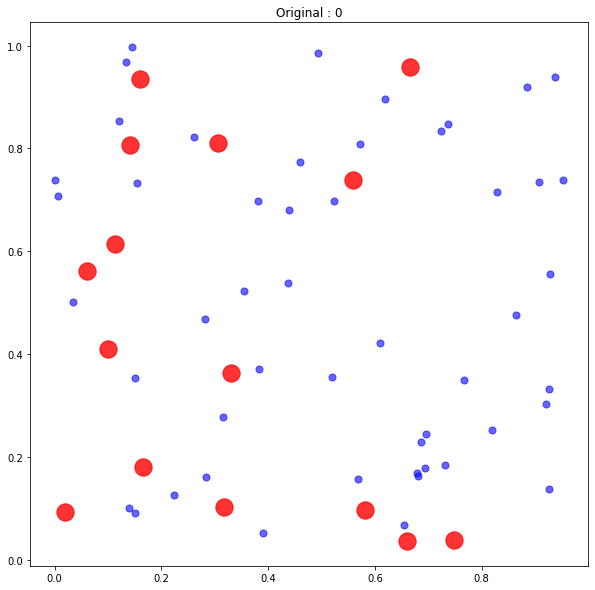

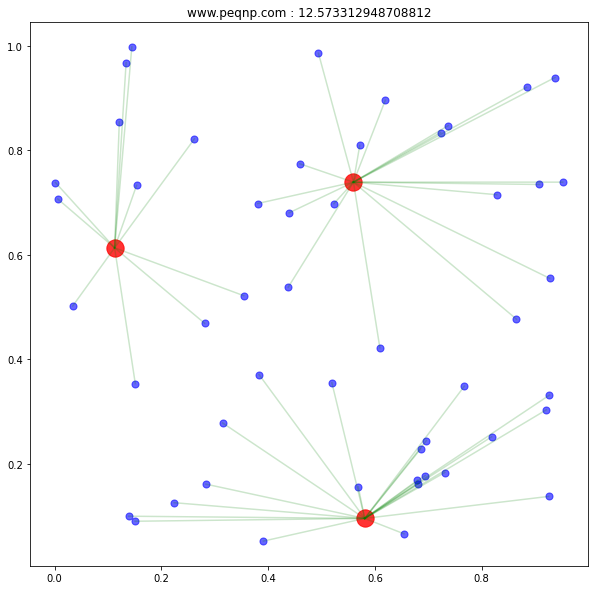

In [39]:
import numpy as np
import peqnp as cnf
import matplotlib.pyplot as plt


def plot(I, J=None, X=None, title='Original', obj=0):
    plt.figure(figsize=(10, 10))
    plt.title('{} : {}'.format(title, obj))
    a, b = zip(*I)
    plt.scatter(a, b, c='blue', s=50, alpha=0.6)
    if J is not None:
        if X is not None:
            for i in range(m):
                for j in range(n):
                    if X[i][j]:
                        plt.plot([I[i][0], J[j][0]], [I[i][1], J[j][1]], 'g-',alpha=0.2)
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    else:
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    plt.show()
    plt.close()


def oracle(seq):
    global O, glb, n
    M = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            M[i][j] = np.linalg.norm(I[i] - J[seq[j]])
    cnf.engine()
    X = np.asarray(cnf.matrix(dimensions=(m, n), is_mip=True))
    cnf.all_binaries(X.flatten())
    assert sum(X.flatten()) == m
    assert (X.sum(axis=1) == 1).all()
    obj = cnf.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
    O = np.vectorize(int)(X)
    return obj

m = 50
k = 15
n = 3
I = np.random.sample(size=(m, 2))    
J = np.random.sample(size=(k, 2))
plot(I, J)
seq = cnf.hess_sequence(k, oracle=oracle, fast=False)
plot(I, J[seq][:n], O, 'www.peqnp.com', oracle(seq))

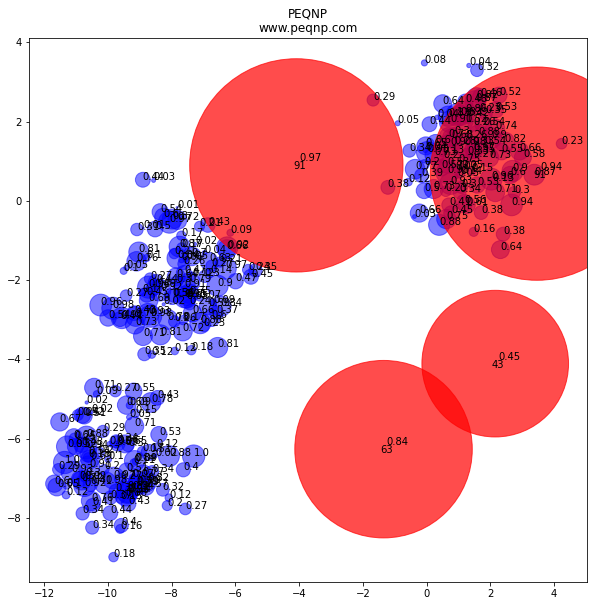

-1254.3372474706314


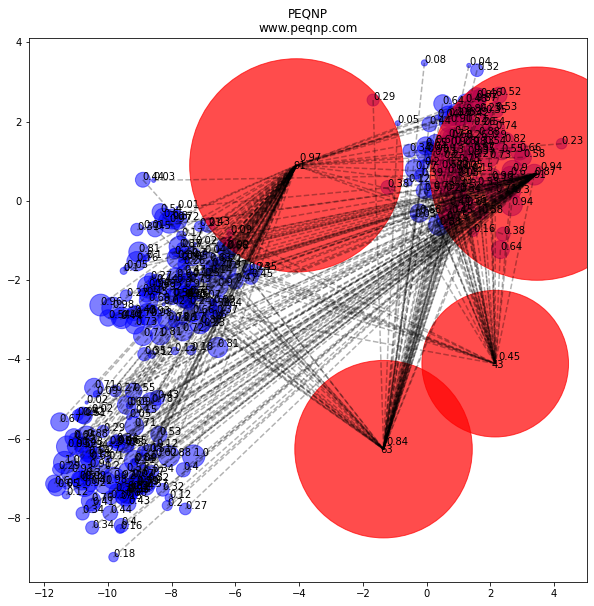

In [40]:
import numpy as np
import peqnp as cnf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def plot(X=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title('PEQNP\nwww.peqnp.com')
    plt.scatter(N[:, 0], N[:, 1], c='b', s=P * 500, alpha=0.5)
    for i in range(m):
        ax.annotate(str(round(P[i], 2)), (N[:, 0][i], N[:, 1][i]), size=10)
    plt.scatter(M[:, 0], M[:, 1], c='r', s=L * 500, alpha=0.7)
    for i in range(n):
        ax.annotate(str(round(T[i], 2)), (M[:, 0][i] + 0.1, M[:, 1][i] + 0.1))
        ax.annotate(str(L[i]), (M[:, 0][i] - 0.1, M[:, 1][i] - 0.1))
    if X is not None:
        for i in range(m):
            for j in range(n):
                if X[i][j]:
                    plt.plot([N[i][0], M[j][0]], [N[i][1], M[j][1]], 'k--', alpha=0.3)
    plt.show()


n = 4

L = np.random.randint(1, 100, size=n)  # capacity x facilities

m = sum(L)

N, _ = make_blobs(n_samples=m)  # customers
P = np.random.sample(size=m)  # priorities x customers
M = np.random.normal(size=(n, 2)) * n  # facilities
T = np.random.sample(size=n)  # priorities x facility
C = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        C[i][j] = np.linalg.norm(N[i] - M[j])

D = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        D[i][j] = P[i] - T[j]

plot()

cnf.engine()
X = np.asarray(cnf.matrix(dimensions=(m, n), is_mip=True))
cnf.all_binaries(X.flatten())
assert (X.sum(axis=0) <= L).all()
assert (X.sum(axis=1) == 1).all()
print(cnf.minimize((X * C * D).sum()))
plot(np.vectorize(int)(X))

# SUDOKU 

is a logic-based, combinatorial number-placement puzzle. The objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (also called "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.

Completed games are always an example of a Latin square which include an additional constraint on the contents of individual regions. For example, the same single integer may not appear twice in the same row, column, or any of the nine 3×3 subregions of the 9×9 playing board.

https://en.wikipedia.org/wiki/Sudoku

In [41]:
import numpy as np
import peqnp as cnf


def expand_line(line):
    return line[0] + line[5:9].join([line[1:5] * (base - 1)] * base) + line[9:13]


def show(board):
    import string
    line0 = expand_line('╔═══╤═══╦═══╗')
    line1 = expand_line('║ . │ . ║ . ║')
    line2 = expand_line('╟───┼───╫───╢')
    line3 = expand_line('╠═══╪═══╬═══╣')
    line4 = expand_line('╚═══╧═══╩═══╝')

    symbol = ' ' + string.printable.replace(' ', '')
    nums = [[''] + [symbol[n] for n in row] for row in board]
    print(line0)
    for r in range(1, side + 1):
        print("".join(n + s for n, s in zip(nums[r - 1], line1.split('.'))))
        print([line2, line3, line4][(r % side == 0) + (r % base == 0)])


def generate(base):
    # pattern for a baseline valid solution
    def pattern(r, c):
        return (base * (r % base) + r // base + c) % side

    # randomize rows, columns and numbers (of valid base pattern)
    from random import sample

    def shuffle(s):
        return sample(s, len(s))

    rBase = range(base)
    rows = [g * base + r for g in shuffle(rBase) for r in shuffle(rBase)]
    cols = [g * base + c for g in shuffle(rBase) for c in shuffle(rBase)]
    nums = shuffle(range(1, base * base + 1))

    # produce board using randomized baseline pattern
    board = [[nums[pattern(r, c)] for c in cols] for r in rows]

    squares = side * side
    empties = (squares * 3) // 4
    for p in map(int, sample(range(squares), empties)):
        board[p // side][p % side] = 0

    show(board)
    return board


base = 4
side = base * base

puzzle = np.asarray(generate(base))

cnf.engine(side.bit_length())

board = np.asarray(cnf.matrix(dimensions=(side, side)))
cnf.apply_single(board.flatten(), lambda x: 1 <= x <= side)

for i in range(side):
    for j in range(side):
        if puzzle[i][j]:
            assert board[i][j] == puzzle[i][j]

for c, r in zip(board, board.T):
    cnf.all_different(c)
    cnf.all_different(r)

for i in range(base):
    for j in range(base):
        cnf.all_different(board[i * base:(i + 1) * base, j * base:(j + 1) * base].flatten())

if cnf.satisfy(turbo=True):
    show(np.vectorize(int)(board))


╔═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╗
║   │ 1 │ 4 │   ║   │   │   │ 2 ║   │   │   │   ║ 5 │ 9 │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │ b ║   │   │ a │   ║   │   │ 2 │ 8 ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 8 │   │   │ d ║   │   │ f │   ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 3 │   ║   │   │ b │ 5 ║   │   │ 4 │   ║ 2 │   │   │   ║
╠═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╣
║   │ 0 │   │   ║ 4 │   │   │   ║   │ 1 │ d │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 2 │   │   │   ║   │   │   │   ║ 0 │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 4 │   │ a │   ║   │   │   │ d ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 

# MAXIMUM CONSTRAINED PARTITITON

http://www.csc.kth.se/~viggo/wwwcompendium/node152.html

In [43]:
import random

import peqnp as cnf

bits = 10
n = 2 * 100

D = [random.randint(1, 2 ** bits) for _ in range(n)]

print('D   : {}'.format(D))

cnf.engine(sum(D).bit_length())

bins, sub, com = cnf.subsets(D, n // 2, complement=True)

assert sum(sub) == sum(com)

if cnf.satisfy(turbo=True):
    sub = [D[i] for i in range(n) if bins.binary[i]]
    com = [D[i] for i in range(n) if not bins.binary[i]]
    print(sum(sub), len(sub), sub)
    print(sum(com), len(com), com)
    print('\n')
else:
    print('Infeasible ...')

D   : [588, 685, 114, 74, 986, 856, 289, 1008, 168, 311, 723, 843, 73, 955, 792, 940, 97, 208, 965, 311, 42, 67, 272, 664, 216, 710, 400, 786, 1005, 228, 124, 957, 692, 255, 607, 261, 794, 602, 249, 388, 79, 803, 911, 761, 391, 933, 731, 155, 92, 82, 996, 524, 55, 443, 471, 192, 861, 626, 233, 299, 873, 865, 173, 215, 852, 129, 204, 851, 320, 63, 915, 883, 855, 62, 1018, 665, 518, 161, 722, 145, 249, 736, 61, 708, 713, 365, 21, 473, 750, 145, 294, 426, 7, 420, 253, 15, 601, 756, 51, 477, 291, 383, 930, 231, 977, 706, 529, 267, 58, 427, 742, 687, 970, 600, 607, 670, 377, 166, 211, 631, 321, 772, 301, 257, 457, 647, 498, 485, 377, 597, 763, 860, 95, 271, 43, 807, 160, 150, 271, 861, 614, 854, 292, 865, 611, 727, 174, 509, 911, 757, 119, 771, 837, 18, 855, 657, 904, 418, 762, 601, 965, 187, 380, 223, 568, 230, 316, 914, 817, 380, 864, 885, 358, 508, 929, 698, 292, 728, 948, 178, 990, 418, 604, 4, 920, 947, 16, 448, 612, 235, 617, 320, 869, 966, 190, 1020, 476, 831, 574, 45]
51066 100 [588

# Like and Share! :)